# Question 1
## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a fully connected feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255.
It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next question when we will be implementing the same using Tensorflow.


Run the first 3 cells. Your code begins after that.

In [ ]:
import numpy as np
from keras.datasets import mnist
import random

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.

In [ ]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

In [ ]:
train_X[0].shape

(784, 1)

## 1.1 Write the code for Sigmoid Function.

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## 1.2 The Network

We will making a class called Network which has certain functions inside it. The cost function used is Cross-Entropy Loss. You need to code only the first 3. Rest are done for you.  There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.

In [ ]:
class Network(object):
    def __init__(self,sizes): # sizes is a list containing the network.
                              # eg : [784,128,10] means input =784 neurons,
                              #    1st hidden layer 128 neurons, output 10 neurons.
        self.sizes=sizes
        self.num_layers=len(sizes)
        self.weights= [np.random.randn(x,y) for x,y in zip(sizes[1:],sizes[:-1])]
        self.biases= [np.random.randn(y, 1) for y in sizes[1:]]

# stop_zone 1. Comment out all the code below. Select all rows below. Click Ctrl + /.
# Include the show function given below above this comment area inside the class.
# Run this cell and then run the code with stop_zone 1 written below.
# After this testing, don't forget to remove the comments. Same, select all, Ctrl+/.

    def show(self):
        print(self.num_layers)
        for bias in self.biases:
            print(bias.shape)
        for weight in self.weights:
            print(weight.shape)

    def forwardpropagation(self,a):
        for b,w in zip(self.biases, self.weights):
            a=sigmoid(np.dot(w, a) + b) # sig (w.a +b)
            # print(a.shape)
        return a

# stop_zone 2. Comment out all the code below. Don't comment out the __init__ method else you will get error.
# Remove comment from print(a.shape) line above. Run this cell. And run the code with stop_zone 2 written below.


    def backpropagation(self,x,y):

        # nothing to do in this 3 lines. it is for creating a one-hot encoded vector of the labels.
        y_t = np.zeros((len(y), 10))
        y_t[np.arange(len(y)), y] = 1
        y_t= y_t.T

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer

        # write the same forward propagation code here but while doing so store the a's.
        for w,b in zip(self.weights,self.biases):
            activation= sigmoid(np.dot(w, activation) + b)
            activation_list.append(activation)

        delta= (activation_list[-1] - y_t) * (activation_list[-1] * (1 - activation_list[-1]))

        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1]= delta
        nabla_w[-1]= np.dot(delta, activation_list[-2].T)

        # print("{} {}".format(nabla_b[-1].shape,nabla_w[-1].shape) )
#stop_zone 3 : remove comment from the print statement just above and run the cell for stop_zone3.
# don't forget commenting out.

        # step 3 : calculation of delta for hidden layers

        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])
            delta= np.dot(self.weights[-j+1].T, delta) * sig_der

            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]= delta
            nabla_w[-j]= np.dot(delta, activation_list[-j-1].T)

        return (nabla_b,nabla_w)
#stop_zone 4 : Run the cell for stop_zone 4.

    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+mini_batch_size] for k in range(0, n_train, mini_batch_size)]

  # Stop zone 5 : Remove comment from the next print line and comment out all the lines below it.
        # print(np.array(mini_batches, dtype=object).shape)

            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,lr)

            self.predict(train_data)
            print("Epoch {0} completed.".format(i+1))

    # the functions below are complete. If you are fine till stop_zone 5, you can run
    # this whole cell and train, test the data by running the last cell of the notebook.
    # You may need to wait for around 10 minutes to see the test predictions.

    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]

    def predict(self,test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)),y) for x,y in test_data]
        # returns the index of that output neuron which has highest activation

        num= sum(int (x==y) for x,y in test_results)
        print ("{0}/{1} classified correctly.".format(num,len(test_data)))


In [ ]:
# stop_zone 1

# def show(self):
#   print(self.num_layers)
#   for bias in self.biases:
#       print(bias.shape)
#   for weight in self.weights:
#       print(weight.shape)

# Copy this show function from here. Paste it inside that Network Class.
# Comment out the show function here. Run this cell.

net=Network([784,128,64,10])
net.show()

# The desired output is :
# 4
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

# Keeping the show function over there in the Network class doesn't make any
# difference. You may delete it if you wish. Better toss a coin.

4
(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [ ]:
# stop_zone 2
# to use this, make sure your data is loaded. Run this cell.
net=Network([784,128,64,10])
print(train_X[0].shape)
[x, y, z, a, b, c, d, e, f, g] = net.forwardpropagation(train_X[0])

# The desired output is :
# (784, 1)
# (128, 1)
# (64, 1)
# (10, 1)
#  If you are getting this, you are correct. Proceed to backwardpropagation.

(784, 1)
(128, 1)
(64, 1)
(10, 1)


In [ ]:
# stop_zone 3
net=Network([784,128,64,10])
net.backpropagation(train_X[0],train_y[0])

# Desired output : (10,1) (10,64)

(10, 1) (10, 64)


In [ ]:
# stop_zone 4
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

# Desired output:
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [ ]:
# Stop zone 5 :  Run this cell, for 10000 samples and batch size of 20, output should be
#       (500,20,2).  500 batches each of size 20 and has 2 objects : train and test data.

net=Network([784,256,128,64,10])
net.SGD(train_data=train_data,epochs=20,mini_batch_size=20,lr=0.01)

(500, 20, 2)


In [ ]:
net=Network([784,128,64,10])
net.SGD(train_data=train_data,epochs=10,mini_batch_size=20,lr=0.01)
print("Test data:")
net.predict(test_data)

/tmp/ipython-input-24-2678544194.py:112: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num= sum(int (x==y) for x,y in test_results)


945/10000 classified correctly.
Epoch 1 completed.
944/10000 classified correctly.
Epoch 2 completed.
944/10000 classified correctly.
Epoch 3 completed.
944/10000 classified correctly.
Epoch 4 completed.
944/10000 classified correctly.
Epoch 5 completed.
944/10000 classified correctly.
Epoch 6 completed.
944/10000 classified correctly.
Epoch 7 completed.
944/10000 classified correctly.
Epoch 8 completed.
944/10000 classified correctly.
Epoch 9 completed.
944/10000 classified correctly.
Epoch 10 completed.
Test data:
89/1000 classified correctly.


# End of question 1

# Question 2


In [ ]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Classifying the Songs

We will be using the Spotify Songs and their Characteristics Dataset, You can access it from : {https://drive.google.com/file/d/178aXv-sSU13D5T4CxuzU3FfNDcz53OIT/view?usp=sharing}
<br>
Solve the Check Points one after another

In [ ]:
import pandas as pd
spotify = pd.read_csv('spotify.csv')

In [ ]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
spotify.shape

(32833, 23)

In [ ]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers

spotify = pd.read_csv('spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
  ### ######################################  Check Point 1     ########################
  (StandardScaler(), features_num),
  (OneHotEncoder(handle_unknown='ignore'), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


In [ ]:
X_train.shape

(24451, 18)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


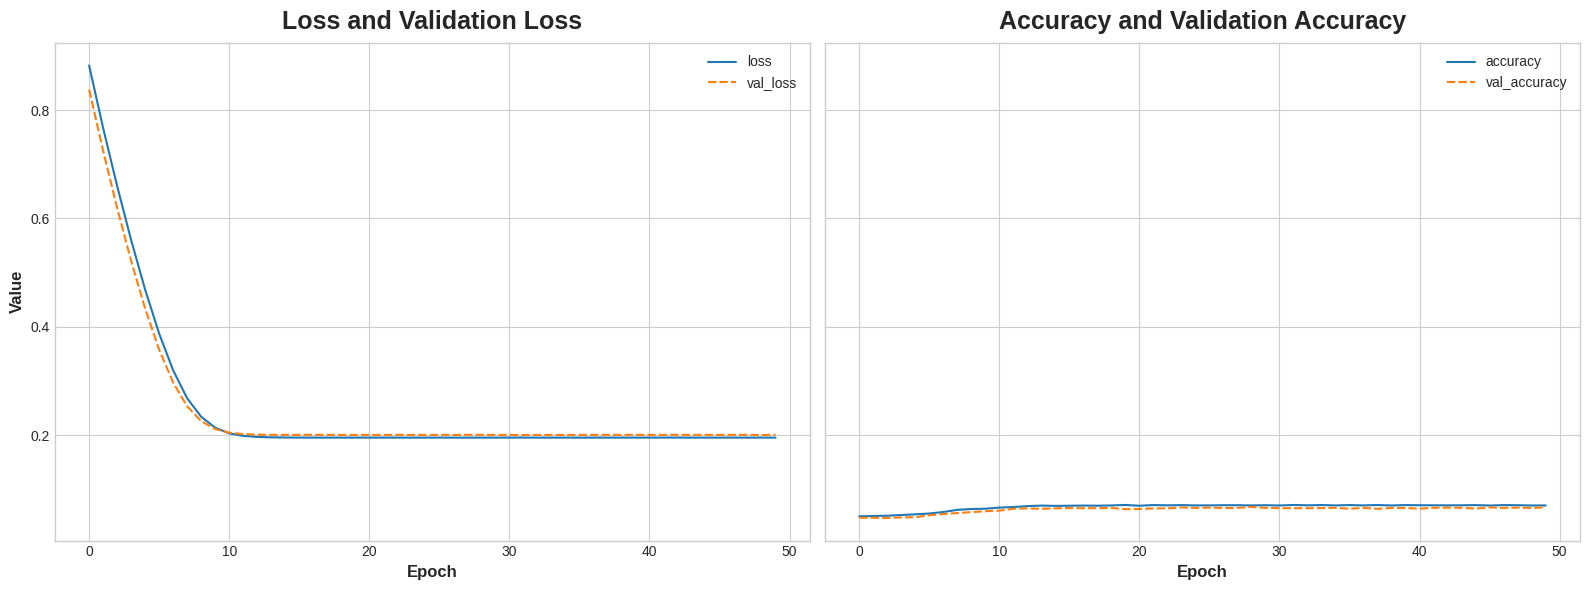

Minimum Validation Loss: 0.2001
Maximum Validation Accuracy: 0.0672


In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])

model.compile(
    ######################## Check Point 2 ##########################################
    optimizer='adam',          # Adam optimizer (adaptive learning rate)
    loss='mae',                # Mean Absolute Error for regression loss
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)

history_df = pd.DataFrame(history.history)
# Create figure and subplots
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # sharey ensures same y-axis scale

# --- Plot 1: Loss ---
sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax1)
ax1.set_title('Loss and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')

# --- Plot 2: Accuracy ---
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax2)
ax2.set_title('Accuracy and Validation Accuracy')
ax2.set_xlabel('Epoch')

# Final adjustments
plt.tight_layout()
plt.show()

print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
print("Maximum Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))


Minimum Validation Loss: 0.2001


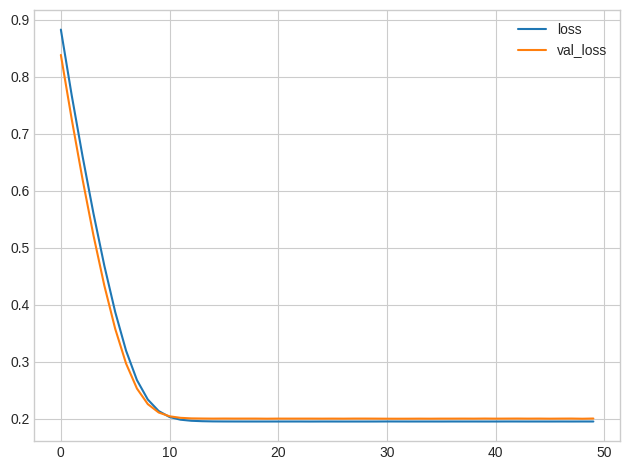

In [ ]:
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.2001


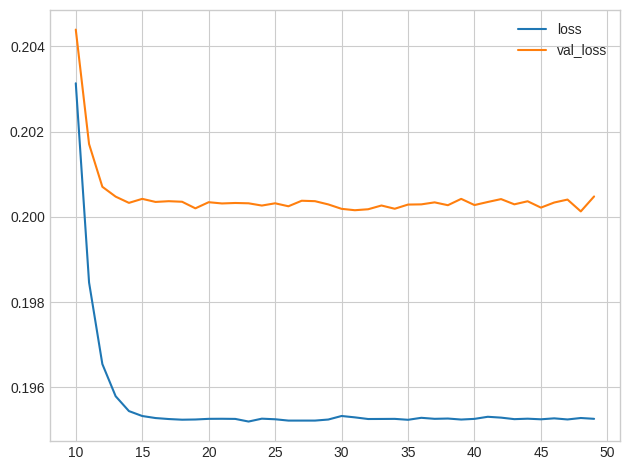

In [ ]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Analyse the validation Loss and Check if it's underfitting or overfitting <br>
Write 200 Words on what you think is happening ?

The above plot shows training loss(blue) ans validation loss(orange).

*   Intially both validation and training losses decreases upto ~15 epochs which the model is learning.
The trainging loss(blue) continues to decreae and reamins lower than validation loss(orange), which stabiles early around ~15 epochs.
*   The divergence between the two curves(training loss decreasing but validation loss remaining constant) suggests the model is **overfitting**. In an overfitting scenario, the model learns the training data very well (possibly too well) but fails to generalize to unseen data as in our case. Since the gap between training loss and validation is not extremely large we can say our model is just **slightly overfitting**.

*   We can rule out underfitting because in the underfitting scenario, both the training loss plot and validation loss plot trends must show a very high losses with no significant gap between them. In our model, the training loss is still improving, indicaating the model has sufficient capacity to learn the data but again further training above 15 epochs gives diminishing results or even potential harm to generalization
*   **Possible Solutions:**

  *   Early Stopping: around 15 epochs
  *   Regularization: Add dropout layers (L2 Regularization)
  *   Data Augmentation: Increase tarining data diversity










Add some capacity to our network. We'll add three hidden layers with 128 units each. Run the next cell to train the network and see the learning curves.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0597 - loss: 0.3013 - val_accuracy: 0.0603 - val_loss: 0.2046
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0670 - loss: 0.1970 - val_accuracy: 0.0649 - val_loss: 0.2016
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0739 - loss: 0.1926 - val_accuracy: 0.0583 - val_loss: 0.2012
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0681 - loss: 0.1901 - val_accuracy: 0.0633 - val_loss: 0.1988
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0685 - loss: 0.1852 - val_accuracy: 0.0592 - val_loss: 0.1983
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0694 - loss: 0.1835 - val_accuracy: 0.0689 - val_loss: 0.1997
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0714 - loss: 0.1849 - val_accuracy: 0.0634 - val_loss: 0.1993
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0692 - loss: 0.1815 - val_accuracy: 0.0586 - val_loss: 0.2005
Epo

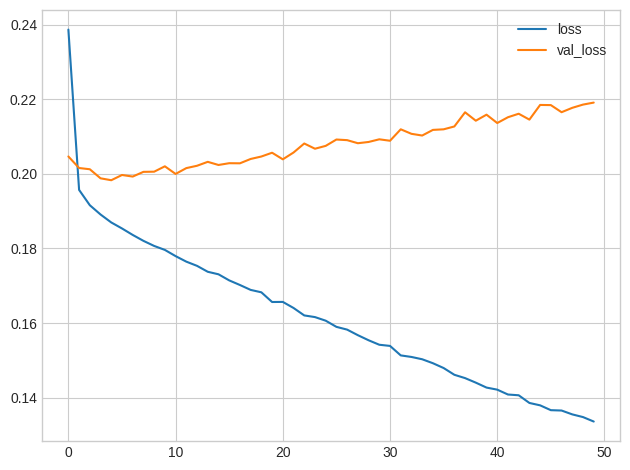

In [ ]:
model = keras.Sequential([
    ##################################### Check Point 3 #########################################
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy'],
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Is the Obtained Validation accuracy the best possible for the data. What is happening in the model and what is the reason for this behaviour explain in 200 Words.

The above validation loss plot shows that the model starts with relatively high losses (around 0.24) and improves over epochs, reaching a minimum validation loss of 0.1983, but the obtained validation performance is **not the best possible** for the data. In fact, it's worse than the simpler model you trained earlier, even though that had fewer layers.

*   Initially, both the training and validation losses decreases slightly, inidcating the model is learning. However, after few epochs (>10 epochs) the validation loss begins to rise contrasting to sharp decreasing of training loss, indicating **overfitting**. This means the model is memorising the training data rather than learning general patterns from training data which are to be transferred to the unseen data.
*   The possible reasons may be:
    1.   Model Complexity: Our present model has three dense layers with 128 neurons each. While this gives our model more power to learn complex functions but it also makes it more prone to fitting noise and other false patterns into the training dataset, leading to overfitting.
    2.   Lack of Regularization: No dropout or L2 regularisation is applied, allowing the model to memorise the training noise.




In [ ]:
# Write code to find best validation accuracy
best_val_acc = history_df['val_accuracy'].max()
print("Best Validation Accuracy: {:.4f}".format(best_val_acc))

Best Validation Accuracy: 0.0689


In [ ]:
# Write Code to stop the training if we have decreasing validation accuracy in 3 iterations
# Write a function from Scratch, Don't use call backs directly
############################################  Check point 4 #################################################

def manual_early_stopping(model, X_train, y_train, X_valid, y_valid,
                          batch_size=512, epochs=50, patience=3):
    history = {
        'loss': [],
        'val_loss': [],
        'accuracy': [],
        'val_accuracy': []
    }

    best_val_acc = -np.inf
    wait = 0

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        # Train on one epoch
        hist = model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            batch_size=batch_size,
            epochs=1,
            verbose=0
        )

        # Save metrics
        history['loss'].append(hist.history['loss'][0])
        history['val_loss'].append(hist.history['val_loss'][0])
        history['accuracy'].append(hist.history.get('accuracy', [0])[0])
        history['val_accuracy'].append(hist.history.get('val_accuracy', [0])[0])

        # Check for improvement
        val_acc = hist.history.get('val_accuracy', [0])[0]
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            wait = 0
        else:
            wait += 1
            print(f"No improvement in val_accuracy. Patience: {wait}/{patience}")

        if wait >= patience:
            print("Early stopping triggered.")
            break

    return pd.DataFrame(history)


In [ ]:
# Train the Model with this

history_df = manual_early_stopping(model, X_train, y_train, X_valid, y_valid)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
No improvement in val_accuracy. Patience: 1/3
Epoch 5/50
No improvement in val_accuracy. Patience: 2/3
Epoch 6/50
No improvement in val_accuracy. Patience: 3/3
Early stopping triggered.


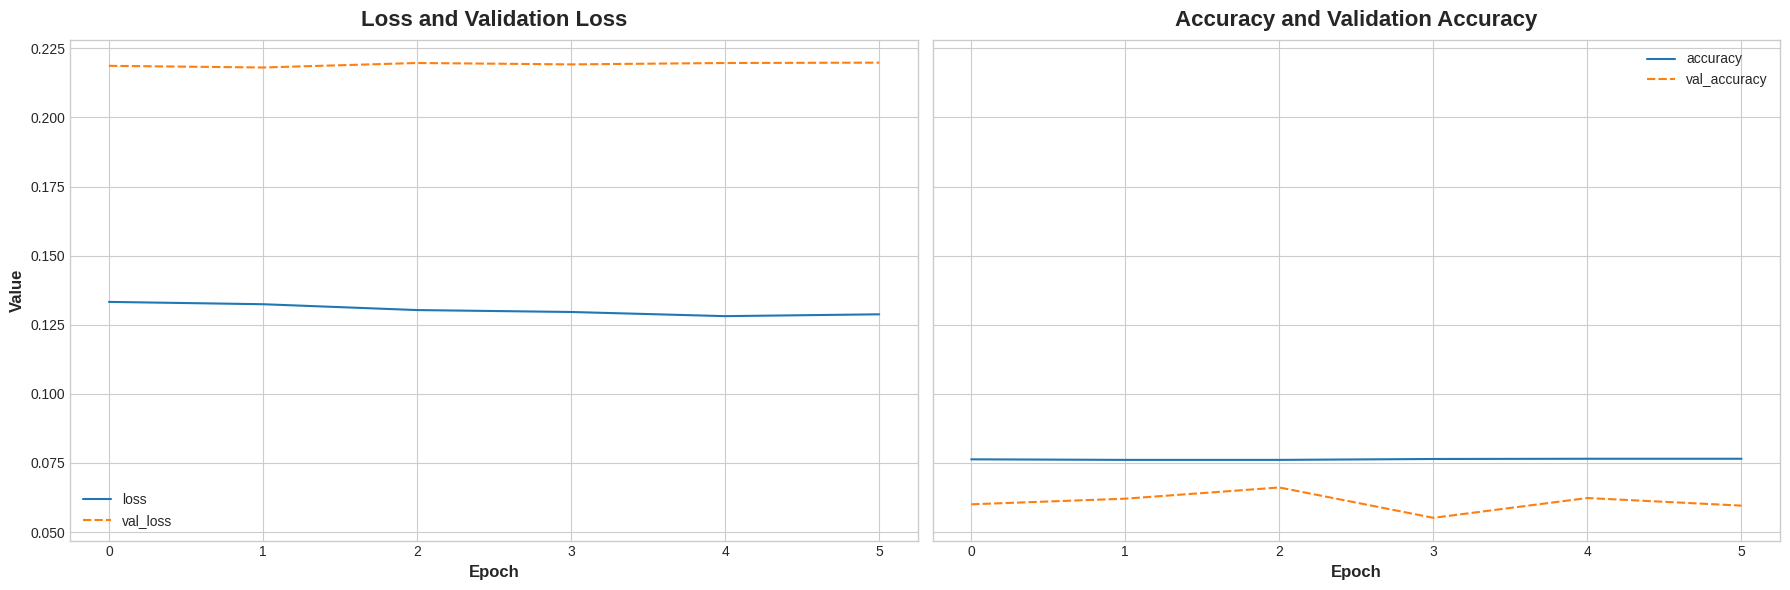

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax1)
ax1.set_title('Loss and Validation Loss', fontsize=16)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax2)
ax2.set_title('Accuracy and Validation Accuracy', fontsize=16)
ax2.set_xlabel('Epoch', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
min_val_loss = history_df['val_loss'].min()
print("Minimum Validation Loss: {:0.4f}".format(min_val_loss));

best_val_acc = history_df['val_accuracy'].max()
print("Best Validation Accuracy: {:.4f}".format(best_val_acc))

Minimum Validation Loss: 0.2181
Best Validation Accuracy: 0.0661
